In [1]:
# imports
import datetime
import pandas as pd
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [2]:
# open as pandas dataframes
tf_df = pd.read_csv(r'./TF2_stats.csv', na_values='NaN')

# change date column
tf_df['Date'] = pd.to_datetime(tf_df['Date'])

# add a julian date column
tf_df['Julian'] = pd.DatetimeIndex(tf_df['Date']).to_julian_date()

In [3]:
stat_hour_list = ['Scout_hours', 'Soldier_hours', 'Pyro_hours',
                  'Demoman_hours', 'Heavy_hours', 'Engineer_hours',
                  'Medic_hours', 'Sniper_hours', 'Spy_hours']
tf_df['TF2_stat_hours'] = tf_df[stat_hour_list].sum(axis=1)
tf_df

,Date,Hours,Scout_hours,Scout_cosmetic,Scout_scattergun,Scout_wrap-assassin,Scout_pistol,Soldier_hours,Soldier_cosmetic,Soldier_rocket-launcher,...,Spy_cosmetic,Spy_spycicle,Spy_big-earner,Spy_dead-ringer,Spy_revovler,Spy_ambassador,Spy_enforcer,Spy_letranger,Julian,TF2_stat_hours
0,2018-02-24,3087,82.0,2793,3631,52,NaN,254.0,41926,21171,...,18739,2785,7112,3706,NaN,NaN,NaN,NaN,2458173.5,1330.0
1,2019-01-10,3339,103.0,5629,5173,76,NaN,300.0,50494,25472,...,24902,3777,7734,4077,1072.0,95.0,303.0,NaN,2458493.5,1582.0
2,2019-08-02,3592,110.0,6949,5835,91,90.0,322.0,55537,27001,...,28918,4213,8321,4361,1140.0,97.0,303.0,NaN,2458697.5,1718.0
3,2020-02-24,3762,116.6,8312,6525,105,233.0,339.1,59292,28211,...,31609,4594,8713,4536,1210.0,98.0,303.0,NaN,2458903.5,1822.4
4,2020-11-19,4122,126.0,9942,7316,109,467.0,370.0,66097,30526,...,35235,5044,9439,4877,1394.0,101.0,303.0,65.0,2459172.5,2032.0
5,2021-09-10,4377,133.0,11382,8010,147,673.0,388.0,70364,31986,...,38812,5611,9877,5248,1622.0,101.0,303.0,147.0,2459467.5,2181.0
6,2022-06-24,4573,143.0,12729,8722,156,901.0,399.0,72890,32827,...,41349,5938,10357,5466,1720.0,102.0,303.0,212.0,2459754.5,2300.0
7,2023-04-11,4809,149.5,14025,9333,196,1157.0,415.9,76653,33916,...,44188,6243,10913,5711,1788.0,102.0,303.0,342.0,2460045.5,2411.7


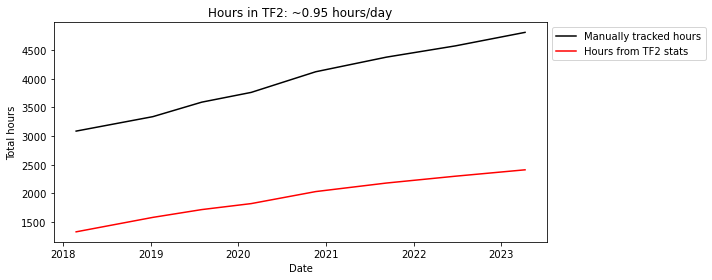

In [4]:
# figure setup
fig = plt.figure(figsize=(10, 4), tight_layout=True)
ax = fig.subplots(nrows=1, ncols=1)

# plot data
ax.plot(tf_df['Date'], tf_df['Hours'], c='k', label='Manually tracked hours')
ax.plot(tf_df['Date'], tf_df['TF2_stat_hours'], c='r', label='Hours from TF2 stats')

# calculate the slope
m, y, R, p, std = linregress(tf_df['Julian'], tf_df['Hours'])
m = round(m, 2)

# labels
ax.set_xlabel('Date')
ax.set_ylabel('Total hours')
ax.set_title('Hours in TF2: ~{} hours/day'.format(m))
ax.legend(bbox_to_anchor = (1, 1))

# save and show
plt.savefig(r'E:/Git_repos/TF2_stats/Figures/Total_hours.png', dpi=300, facecolor='white', transparent=False)
plt.show()

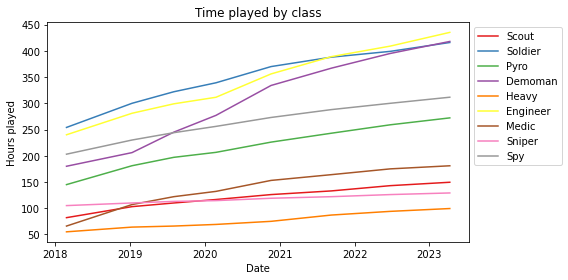

In [5]:
# figure setup
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Set1.colors)
fig = plt.figure(figsize=(8, 4), tight_layout=True)
ax = fig.subplots(nrows=1, ncols=1)

# plot data
ax.plot(tf_df['Date'], tf_df['Scout_hours'], label='Scout')
ax.plot(tf_df['Date'], tf_df['Soldier_hours'], label='Soldier')
ax.plot(tf_df['Date'], tf_df['Pyro_hours'], label='Pyro')
ax.plot(tf_df['Date'], tf_df['Demoman_hours'], label='Demoman')
ax.plot(tf_df['Date'], tf_df['Heavy_hours'], label='Heavy')
ax.plot(tf_df['Date'], tf_df['Engineer_hours'], label='Engineer')
ax.plot(tf_df['Date'], tf_df['Medic_hours'], label='Medic')
ax.plot(tf_df['Date'], tf_df['Sniper_hours'], label='Sniper')
ax.plot(tf_df['Date'], tf_df['Spy_hours'], label='Spy')

# labels
ax.set_xlabel('Date')
ax.set_ylabel('Hours played')
ax.set_title('Time played by class')
ax.legend(bbox_to_anchor = (1, 1))

# save and show
plt.savefig(r'E:/Git_repos/TF2_stats/Figures/Class_hours.png', dpi=300, facecolor='white', transparent=False)
plt.show()

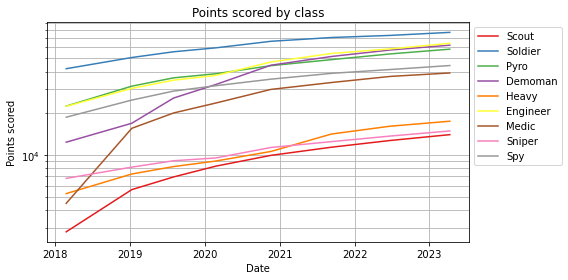

In [6]:
# figure setup
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Set1.colors)
fig = plt.figure(figsize=(8, 4), tight_layout=True)
ax = fig.subplots(nrows=1, ncols=1)

# plot data
ax.plot(tf_df['Date'], tf_df['Scout_cosmetic'], label='Scout')
ax.plot(tf_df['Date'], tf_df['Soldier_cosmetic'], label='Soldier')
ax.plot(tf_df['Date'], tf_df['Pyro_cosmetic'], label='Pyro')
ax.plot(tf_df['Date'], tf_df['Demoman_cosmetic'], label='Demoman')
ax.plot(tf_df['Date'], tf_df['Heavy_cosmetic'], label='Heavy')
ax.plot(tf_df['Date'], tf_df['Engineer_cosmetic'], label='Engineer')
ax.plot(tf_df['Date'], tf_df['Medic_cosmetic'], label='Medic')
ax.plot(tf_df['Date'], tf_df['Sniper_cosmetic'], label='Sniper')
ax.plot(tf_df['Date'], tf_df['Spy_cosmetic'], label='Spy')

# labels
ax.set_xlabel('Date')
ax.set_ylabel('Points scored')
ax.set_title('Points scored by class')
ax.set_yscale('log')
plt.grid(which='both')
ax.legend(bbox_to_anchor = (1, 1))

# save and show
plt.savefig(r'E:/Git_repos/TF2_stats/Figures/Class_points.png', dpi=300, facecolor='white', transparent=False)
plt.show()

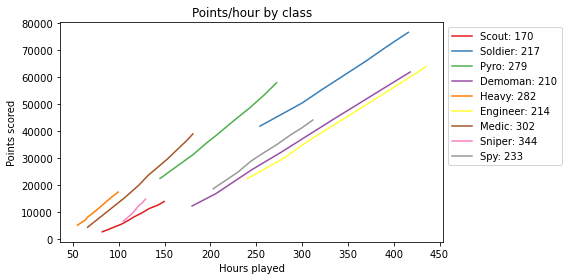

In [7]:
# figure setup
plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Set1.colors)
fig = plt.figure(figsize=(8, 4), tight_layout=True)
ax = fig.subplots(nrows=1, ncols=1)

# calculate slopes:
scout = linregress(tf_df['Scout_hours'], tf_df['Scout_cosmetic'])
soldier = linregress(tf_df['Soldier_hours'], tf_df['Soldier_cosmetic'])
pyro = linregress(tf_df['Pyro_hours'], tf_df['Pyro_cosmetic'])
demoman = linregress(tf_df['Demoman_hours'], tf_df['Demoman_cosmetic'])
heavy = linregress(tf_df['Heavy_hours'], tf_df['Heavy_cosmetic'])
engineer = linregress(tf_df['Engineer_hours'], tf_df['Engineer_cosmetic'])
medic = linregress(tf_df['Medic_hours'], tf_df['Medic_cosmetic'])
sniper = linregress(tf_df['Sniper_hours'], tf_df['Sniper_cosmetic'])
spy = linregress(tf_df['Spy_hours'], tf_df['Spy_cosmetic'])

# plot data
ax.plot(tf_df['Scout_hours'], tf_df['Scout_cosmetic'], label='Scout: {}'.format(round(scout.slope)))
ax.plot(tf_df['Soldier_hours'], tf_df['Soldier_cosmetic'], label='Soldier: {}'.format(round(soldier.slope)))
ax.plot(tf_df['Pyro_hours'], tf_df['Pyro_cosmetic'], label='Pyro: {}'.format(round(pyro.slope)))
ax.plot(tf_df['Demoman_hours'], tf_df['Demoman_cosmetic'], label='Demoman: {}'.format(round(demoman.slope)))
ax.plot(tf_df['Heavy_hours'], tf_df['Heavy_cosmetic'], label='Heavy: {}'.format(round(heavy.slope)))
ax.plot(tf_df['Engineer_hours'], tf_df['Engineer_cosmetic'], label='Engineer: {}'.format(round(engineer.slope)))
ax.plot(tf_df['Medic_hours'], tf_df['Medic_cosmetic'], label='Medic: {}'.format(round(medic.slope)))
ax.plot(tf_df['Sniper_hours'], tf_df['Sniper_cosmetic'], label='Sniper: {}'.format(round(sniper.slope)))
ax.plot(tf_df['Spy_hours'], tf_df['Spy_cosmetic'], label='Spy: {}'.format(round(spy.slope)))

# labels
ax.set_xlabel('Hours played')
ax.set_ylabel('Points scored')
ax.set_title('Points/hour by class')
ax.legend(bbox_to_anchor = (1, 1))

# save and show
plt.savefig(r'E:/Git_repos/TF2_stats/Figures/Hours_points.png', dpi=300, facecolor='white', transparent=False)
plt.show()

In [8]:
# get lists of each class's weapons
scout_weapon_list = [col for col in tf_df.columns if 'Scout' in col and 'hours' not in col and 'cosmetic' not in col]
soldier_weapon_list = [col for col in tf_df.columns if 'Soldier' in col and 'hours' not in col and 'cosmetic' not in col]
pyro_weapon_list = [col for col in tf_df.columns if 'Pyro' in col and 'hours' not in col and 'cosmetic' not in col]
demoman_weapon_list = [col for col in tf_df.columns if 'Demo' in col and 'hours' not in col and 'cosmetic' not in col]
heavy_weapon_list = [col for col in tf_df.columns if 'Heavy' in col and 'hours' not in col and 'cosmetic' not in col]
engineer_weapon_list = [col for col in tf_df.columns if 'Engineer' in col and 'hours' not in col and 'cosmetic' not in col]
medic_weapon_list = [col for col in tf_df.columns if 'Medic' in col and 'hours' not in col and 'cosmetic' not in col]
sniper_weapon_list = [col for col in tf_df.columns if 'Sniper' in col and 'hours' not in col and 'cosmetic' not in col]
spy_weapon_list = [col for col in tf_df.columns if 'Spy' in col and 'hours' not in col and 'cosmetic' not in col]

In [9]:
# remove 1-date weapons
soldier_weapon_list.remove('Soldier_panic-attack')
pyro_weapon_list.remove('Pyro_panic-attack')
heavy_weapon_list.remove('Heavy_panic-attack')
engineer_weapon_list.remove('Engineer_panic-attack')

In [10]:
def plot_weapons_date(class_name, weapon_list):
    
    # figure setup
    plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Set2.colors)
    fig = plt.figure(figsize=(8, 4), tight_layout=True)
    ax = fig.subplots(nrows=1, ncols=1)
    
    # plot each weapon
    for weapon in weapon_list:
        ax.plot(tf_df['Date'], 
                tf_df[weapon], 
                label=weapon[len(class_name)+1:])
        
    # labels
    ax.set_xlabel('Date')
    ax.set_ylabel('log(Kills/Points)')
    ax.set_title('Stranges: {}'.format(class_name))
    ax.set_yscale('log')
    ax.legend(bbox_to_anchor = (1, 1))

    # save and show
    plt.savefig(r'E:/Git_repos/TF2_stats/Figures/Stranges_by_date-{}.png'.format(class_name), 
                dpi=300, 
                facecolor='white', 
                transparent=False)
    plt.show()

In [11]:
def plot_weapons_hours(class_name, weapon_list):
    
    # figure setup
    plt.rcParams['axes.prop_cycle'] = plt.cycler('color', plt.cm.Set2.colors)
    fig = plt.figure(figsize=(8, 4), tight_layout=True)
    ax = fig.subplots(nrows=1, ncols=1)
    
    # plot each weapon
    for weapon in weapon_list:
        ax.plot(tf_df[class_name + '_hours'], 
                tf_df[weapon], 
                label=weapon[len(class_name)+1:])
        
    # labels
    ax.set_xlabel('Hours played as ' + class_name)
    ax.set_ylabel('log(Kills/Points)')
    ax.set_title('Stranges: {}'.format(class_name))
    ax.set_yscale('log')
    ax.legend(bbox_to_anchor = (1, 1))

    # save and show
    plt.savefig(r'E:/Git_repos/TF2_stats/Figures/Stranges_by_hours-{}.png'.format(class_name), 
                dpi=300, 
                facecolor='white', 
                transparent=False)
    plt.show()

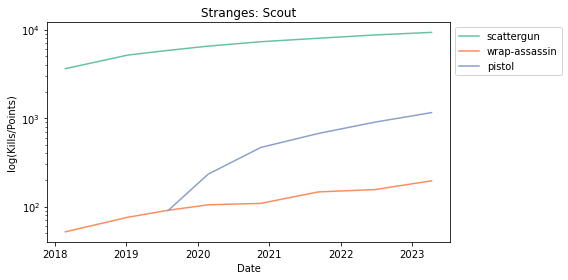

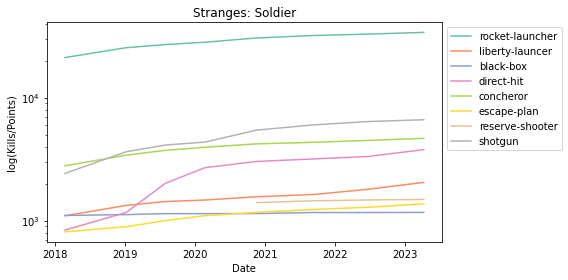

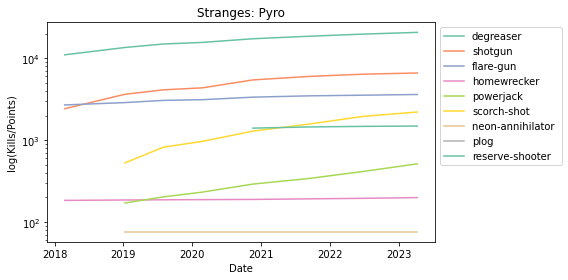

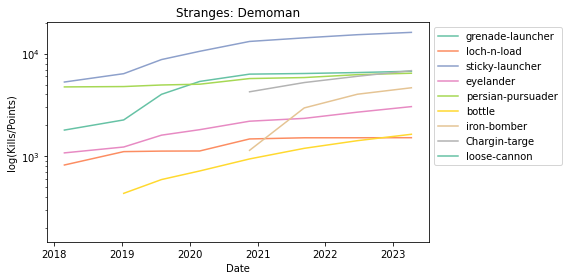

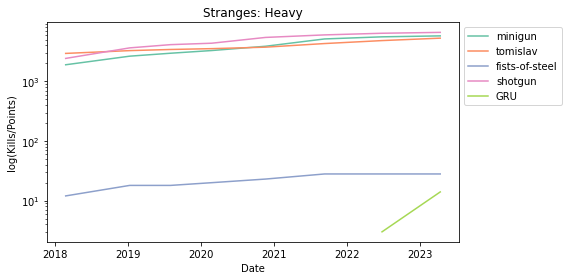

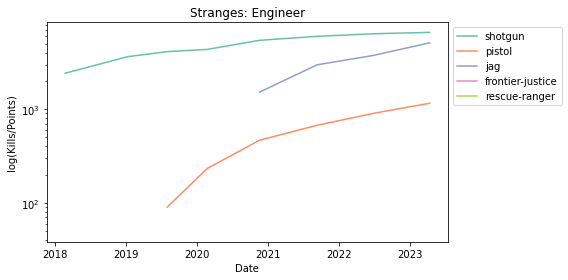

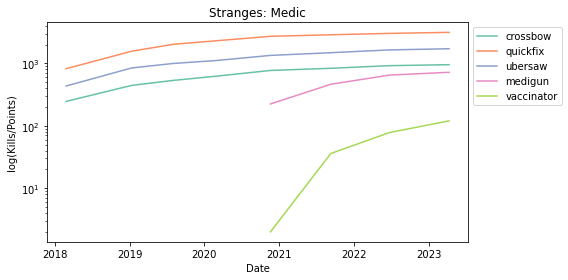

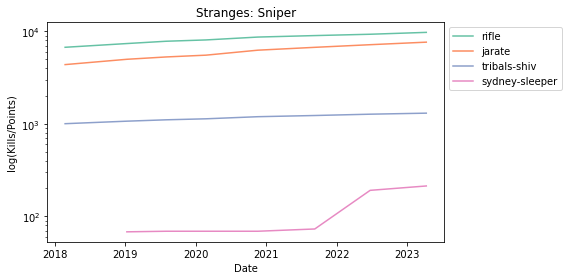

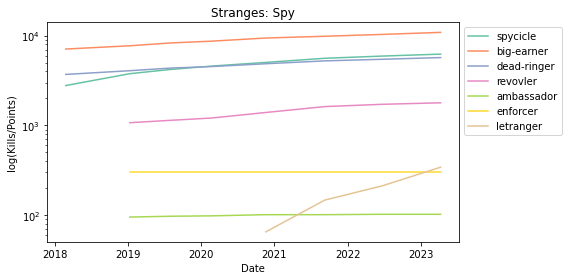

In [12]:
# generate plots for every class
plot_weapons_date('Scout', scout_weapon_list)
plot_weapons_date('Soldier', soldier_weapon_list)
plot_weapons_date('Pyro', pyro_weapon_list)
plot_weapons_date('Demoman', demoman_weapon_list)
plot_weapons_date('Heavy', heavy_weapon_list)
plot_weapons_date('Engineer', engineer_weapon_list)
plot_weapons_date('Medic', medic_weapon_list)
plot_weapons_date('Sniper', sniper_weapon_list)
plot_weapons_date('Spy', spy_weapon_list)

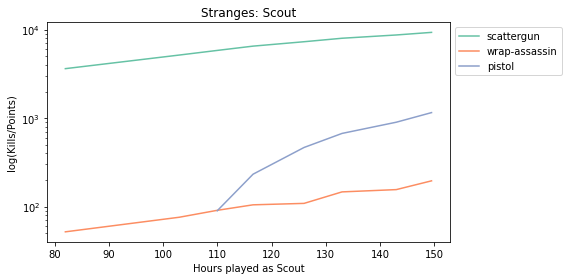

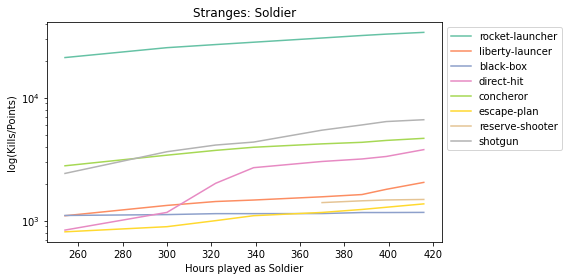

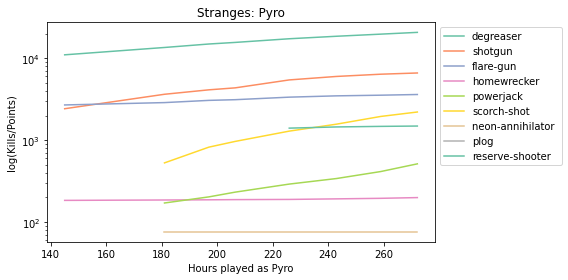

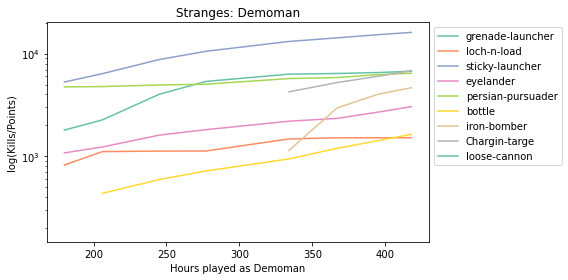

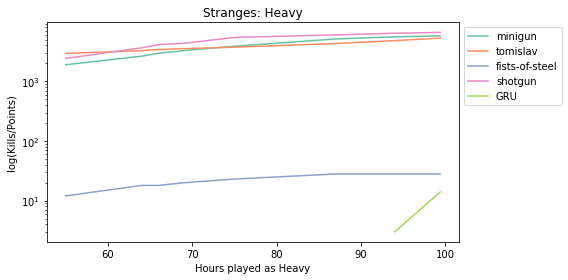

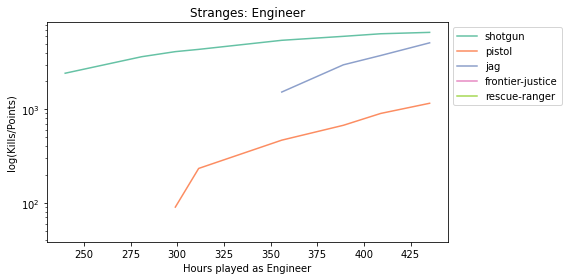

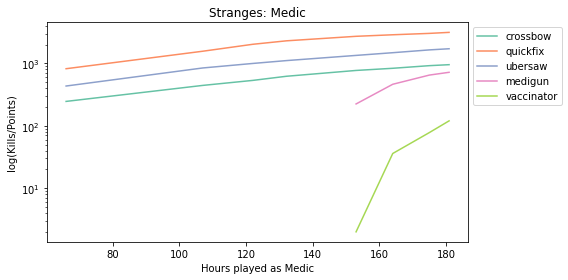

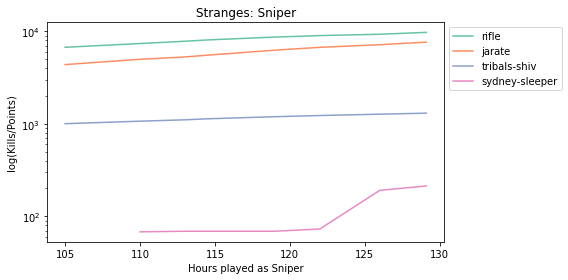

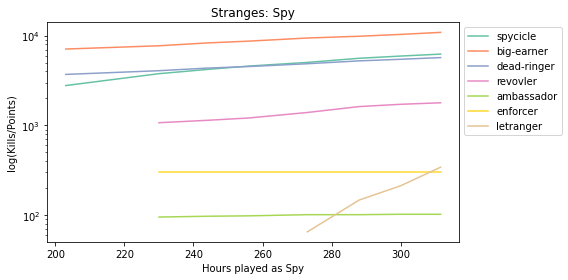

In [13]:
# generate plots for every class
plot_weapons_hours('Scout', scout_weapon_list)
plot_weapons_hours('Soldier', soldier_weapon_list)
plot_weapons_hours('Pyro', pyro_weapon_list)
plot_weapons_hours('Demoman', demoman_weapon_list)
plot_weapons_hours('Heavy', heavy_weapon_list)
plot_weapons_hours('Engineer', engineer_weapon_list)
plot_weapons_hours('Medic', medic_weapon_list)
plot_weapons_hours('Sniper', sniper_weapon_list)
plot_weapons_hours('Spy', spy_weapon_list)